# Make EGFR Figure 1B Cis effect 

This notebook graphs the pearson correlation between EGFR copy number and EGFR proteomics. It shows how an EGFR copy number mutation effects protein levels of EGFR (cis effect).

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
def myTrunc(theNumber, theDigits):

    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [15]:
def plot_pearson(df1,x_axis, y_axis, hue = "none", title = "", ra_stats = False, x_coor= 1 , y_coor = 1, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    if hue != "none":   
      
        df1_subset = df1[[x_axis,y_axis,hue]]
        df1_subset = df1_subset.dropna(axis=0, how="any")
        count_row = df1_subset.shape[0]
        if count_row > 30:
            x1 = df1_subset[[x_axis]].values
            y1 = df1_subset[[y_axis]].values
            x1 = x1[:,0]
            y1 = y1[:,0]
            corr, pval = scipy.stats.pearsonr(x1,y1)

            sns.set(style="darkgrid")
            plt.rcParams["figure.figsize"] = (30,22)
            graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, hue= hue, fit_reg=False)
            sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
            graph.set(title = title)
        else:
            return 0

    if hue == "none":
        
        df1_subset = df1[[x_axis,y_axis]]
        df1_subset = df1_subset.dropna(axis=0, how="any")
        count_row = df1_subset.shape[0]
        if count_row > 30:
            x1 = df1_subset[[x_axis]].values
            y1 = df1_subset[[y_axis]].values
            x1 = x1[:,0]
            y1 = y1[:,0]
            corr, pval = scipy.stats.pearsonr(x1,y1)

            sns.set(style="darkgrid")
            graph = sns.lmplot(x= x_axis, y= y_axis, data=df1_subset, fit_reg=False)
            sns.regplot(x=x1, y=y1, data=df1_subset,scatter = False)
            plt.title(label = title, fontsize = 30)
            plt.xlabel(x_axis, fontsize=20)
            plt.ylabel( y_axis, fontsize=20)
            plt.xticks(fontsize = 17)
            plt.yticks(fontsize = 17)
        else:
            return 0

    if ra_stats:
        pval = myTrunc(pval,5)
        corr = myTrunc(corr,3)
        plt.text(x_coor,y_coor, "Correlation: %s\nPvalue: %s"%(corr,pval), fontsize = 17)
        
    if save_file_name != "file_name":
        plt.tight_layout()
        plt.subplots_adjust(top=0.88)
        plt.savefig(save_file_name+'.png', dpi = 300)
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()

In [7]:
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
  
    else: 
        return "Not Enough Data"
   

In [8]:
#Load cptac data sets
brain = cptac.Gbm()
kidney = cptac.Ccrcc()
Ovar = cptac.Ovarian()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Hnscc = cptac.Hnscc()
Lscc = cptac.Lscc()

cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 8)


version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


# Step 1 Create Data Frame

For each cancer type create a df that combines proteomics and CNV. Then merge clinical dataframe and filter df to only have tumor samples. 

# Step 2  Call Plotting Function

# GBM

In [12]:
prot_CNV = brain.join_omics_to_omics(df1_name="proteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR")
mutation = brain.get_clinical()
mutation = mutation[["Sample_Tumor_Normal"]]
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"] #use only Tumor data


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834, PT-NPJ7.N, PT-P44H.N, PT-Q2AG.N, PT-QVJO.N, PT-R55F.N, PT-RN5K.N, PT-RU72.N, PT-UTHO.N, PT-WVLH.N, PT-Y8DK.N (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


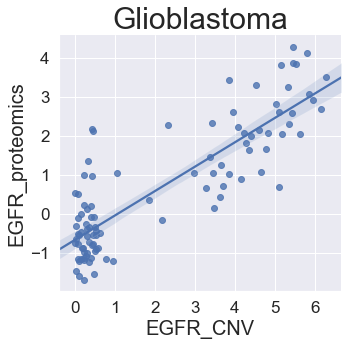

In [13]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "Glioblastoma", ra_stats = False ,show_plot = True, save_file_name = "png_files/Step2Cis_Gbm")

In [14]:
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

Correlation: 0.8512687266142293
P_value:1.235330479008739e-28


# Kidney 

In [9]:
prot_CNV = kidney.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = kidney.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00004.N, C3L-00010.N, C3L-00011.N, C3L-00026.N, C3L-00079.N, C3L-00088.N, C3L-00096.N, C3L-00097.N, C3L-00103.N, C3L-00183.N, C3L-00360.N, C3L-00369.N, C3L-00416.N, C3L-00418.N, C3L-00447.N, C3L-00448.N, C3L-00561.N, C3L-00581.N, C3L-00583.N, C3L-00606.N, C3L-00607.N, C3L-00791.N, C3L-00814.N, C3L-00902.N, C3L-00907.N, C3L-00908.N, C3L-00910.N, C3L-00917.N, C3L-01281.N, C3L-01286.N, C3L-01287.N, C3L-01302.N, C3L-01313.N, C3L-01603.N, C3L-01607.N, C3L-01836.N, C3L-01861.N, C3L-01882.N, C3L-01885.N, C3N-00148.N, C3N-00149.N, C3N-00150.N, C3N-00168.N, C3N-00177.N, C3N-00194.N, C3N-00242.N, C3N-00244.N, C3N-00246.N, C3N-00310.N, C3N-00312.N, C3N-00314.N, C3N-00317.N, C3N-00320.N, C3N-00390.N, C3N-00435.N, C3N-00437.N, C3N-00491.N, C3N-00492.N, C3N-00494.N, C3N-00495.N, C3N-00573.N, C3N-00577.N, C3N-00646.N, C3N-00733.N, C3N-00831.N, C3N-00834.N, C3N-00852.N, C3N-

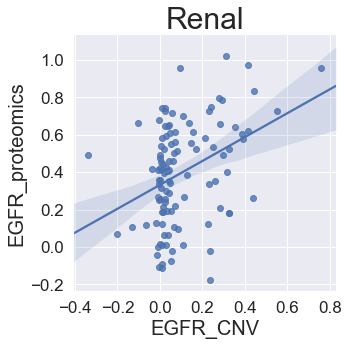

Correlation: 0.3761403530200309
P_value:5.12862395274026e-05


In [10]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue ="none", ra_stats = False, show_plot = True, title = "Renal", save_file_name = "png_files/Step2Cis_Kidney")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Ovarian 

In [11]:
prot_CNV = Ovar.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = Ovar.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01OV007.N, 01OV008.N, 01OV010.N, 01OV013.N, 01OV017.N, 01OV019.N, 01OV023.N, 01OV029, 01OV029.N, 01OV039.N, 02OV001.N, 02OV015, 11OV002.N, 11OV010.N, 14OV011.N, 14OV029.N, 15OV001.N, 17OV001.N, 17OV002.N, 17OV003.N, 17OV004.N, 17OV005.N (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01OV002, 01OV008, 01OV010, 01OV013, 01OV019, 01OV045, 01OV046, 01OV049, 02OV035, 02OV040, 02OV042, 02OV045, 04OV041, 11OV009, 13OV004, 17OV019, 17OV034, 22OV001, 26OV010 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


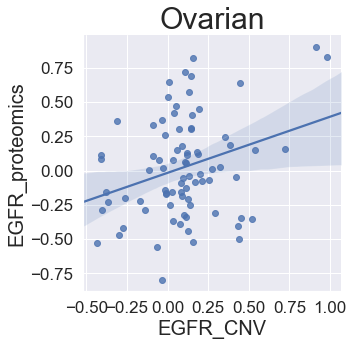

Correlation: 0.3021737315261447
P_value:0.006112209575176951


In [12]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", ra_stats = False,title = "Ovarian", show_plot = True, save_file_name = "png_files/Step2Cis_Ovarian")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")

# Colon

In [13]:
prot_CNV = colon.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
mutation = colon.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 01CO001.N, 01CO005.N, 01CO006.N, 01CO008.N, 01CO013.N, 01CO014.N, 01CO015.N, 01CO019.N, 01CO022.N, 05CO002.N, 05CO003.N, 05CO006.N, 05CO007.N, 05CO011.N, 05CO015.N, 05CO020.N, 05CO026.N, 05CO028.N, 05CO029.N, 05CO032.N, 05CO033.N, 05CO034.N, 05CO035.N, 05CO037.N, 05CO039.N, 05CO041.N, 05CO044.N, 05CO045, 05CO045.N, 05CO047.N, 05CO048.N, 05CO049.N, 05CO050.N, 05CO053.N, 05CO054.N, 06CO001.N, 06CO002.N, 09CO005.N, 09CO006.N, 09CO008.N, 09CO011.N, 09CO013.N, 09CO014.N, 09CO015.N, 09CO018.N, 09CO019.N, 09CO022.N, 11CO005.N, 11CO007.N, 11CO008.N, 11CO010.N, 11CO018.N, 11CO019.N, 11CO020.N, 11CO021.N, 11CO022.N, 11CO027.N, 11CO030.N, 11CO031.N, 11CO032.N, 11CO033.N, 11CO036.N, 11CO037.N, 11CO039.N, 11CO042.N, 11CO043.N, 11CO044.N, 11CO045.N, 11CO047.N, 11CO048.N, 11CO051.N, 11CO052.N, 11CO053.N, 11CO054.N, 11CO057.N, 11CO058.N, 11CO060.N, 11CO061.N, 11CO062.N, 11CO070.

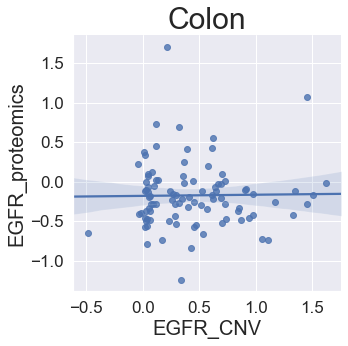

Correlation: 0.015014893213497638
P_value:0.8851705451312762


In [14]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics",hue = "none", ra_stats = False, title = "Colon", show_plot = True, save_file_name = "png_files/Step2Cis_Colon")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")


# Brca 

In [15]:
prot_CNV = brca.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = brca.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


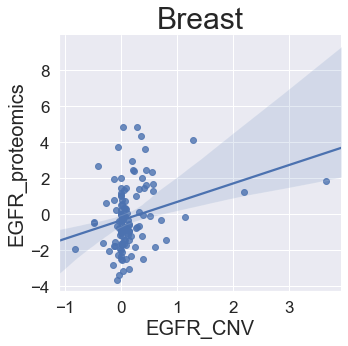

Correlation: 0.2717791141678874
P_value:0.003301432638642013


In [16]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", ra_stats = False, title = "Breast", show_plot = True, save_file_name = "png_files/Step2Cis_Brca")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")


# LUAD

In [17]:
prot_CNV = luad.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = luad.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00001.N, C3L-00009.N, C3L-00080.N, C3L-00083.N, C3L-00093.N, C3L-00094.N, C3L-00095.N, C3L-00140.N, C3L-00144.N, C3L-00263.N, C3L-00279.N, C3L-00368.N, C3L-00412.N, C3L-00422.N, C3L-00510.N, C3L-00604.N, C3L-00893.N, C3L-00913.N, C3L-00973.N, C3L-01330.N, C3L-01632.N, C3L-01682.N, C3L-01683.N, C3L-01889.N, C3L-01890, C3L-01890.N, C3L-01924.N, C3L-02219.N, C3L-02345.N, C3L-02348.N, C3L-02350.N, C3L-02365.N, C3L-02508.N, C3L-02549.N, C3N-00167.N, C3N-00169.N, C3N-00175.N, C3N-00180.N, C3N-00199.N, C3N-00203.N, C3N-00217.N, C3N-00223.N, C3N-00293.N, C3N-00433.N, C3N-00546.N, C3N-00547.N, C3N-00549.N, C3N-00550.N, C3N-00551.N, C3N-00552.N, C3N-00556.N, C3N-00559.N, C3N-00560.N, C3N-00572.N, C3N-00574.N, C3N-00578.N, C3N-00579.N, C3N-00580.N, C3N-00704.N, C3N-00737.N, C3N-00738.N, C3N-00959.N, C3N-01016.N, C3N-01021.N, C3N-01023.N, C3N-01024.N, C3N-01030.N, C3N-01

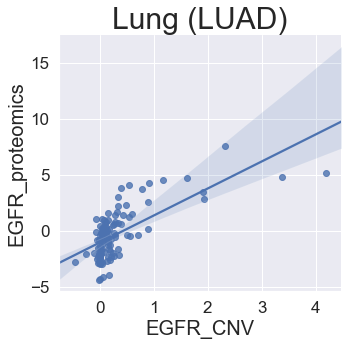

Correlation: 0.6881251124110952
P_value:1.375121355381228e-16


In [18]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = 'none', title = "Lung (LUAD)", ra_stats = False, show_plot = True, save_file_name = "png_files/Step2Cis_Luad")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")


# HNSCC

In [19]:
prot_CNV = Hnscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
mutation = Hnscc.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00994.C, C3L-00994.N, C3L-00995.N, C3L-00997.N, C3L-00999.N, C3L-01237.N, C3L-02617, C3L-02617.C, C3L-02617.N, C3L-02621.N, C3L-02651.N, C3L-03378.N, C3L-04350.C, C3L-04354.N, C3L-04844.N, C3L-05257.C, C3N-00204.N, C3N-00295.N, C3N-00306.N, C3N-00307.N, C3N-00498.N, C3N-00519.N, C3N-00829.N, C3N-00857.N, C3N-01337.N, C3N-01338.N, C3N-01340.N, C3N-01620.N, C3N-01645.N, C3N-01754.N, C3N-01756.N, C3N-01757.C, C3N-01758.N, C3N-01858.N, C3N-01859.N, C3N-01943.N, C3N-01944.N, C3N-01946.N, C3N-01947.N, C3N-02279.N, C3N-02693.N, C3N-02713.N, C3N-02714.N, C3N-02727, C3N-03008.N, C3N-03011.N, C3N-03012.N, C3N-03013.N, C3N-03015.N, C3N-03027.N, C3N-03028.N, C3N-03042.C, C3N-03045.N, C3N-03488.N, C3N-03490.N, C3N-03619.N, C3N-03620.N, C3N-03781.N, C3N-03837.N, C3N-03841.N, C3N-03849.N, C3N-03876.N, C3N-03878.N, C3N-03888.N, C3N-03928.N, C3N-03933.N, C3N-04275.N, C3N-0427

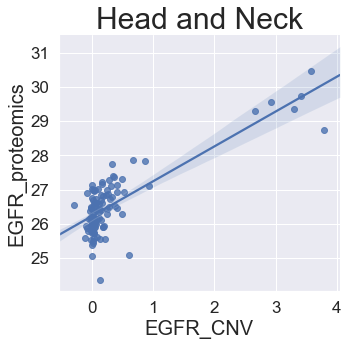

Correlation: 0.807644126618269
P_value:7.850887605030991e-26


In [20]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "Head and Neck", ra_stats = False, show_plot = True, save_file_name = "png_files/Step2Cis_Hnscc")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")


# LSCC

In [21]:
prot_CNV = Lscc.join_omics_to_omics(df1_name="proteomics", df2_name="CNV")
prot_CNV.columns = prot_CNV.columns.droplevel(1) #drop multi-index level
mutation = Lscc.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
prot_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-00081.N, C3L-00415.N, C3L-00445.N, C3L-00568.N, C3L-00603.N, C3L-00904.N, C3L-00923.N, C3L-00927.N, C3L-00993.N, C3L-01000.N, C3L-01285.N, C3L-01455.N, C3L-01606.N, C3L-01663.N, C3L-01884.N, C3L-02127.N, C3L-02130.N, C3L-02163.N, C3L-02164.N, C3L-02168.N, C3L-02349.N, C3L-02358.N, C3L-02546.N, C3L-02552.N, C3L-02619.N, C3L-02625.N, C3L-02627.N, C3L-02629.N, C3L-02646.N, C3L-02648.N, C3L-02649.N, C3L-02650.N, C3L-02660.N, C3L-02665.N, C3L-02669.N, C3L-02891.N, C3L-02951.N, C3L-02963.N, C3L-02964.N, C3L-02968.N, C3L-02969.N, C3L-03272.N, C3L-03961.N, C3L-03962.N, C3L-03963.N, C3L-03965.N, C3L-04013.N, C3L-04014.N, C3L-04071.N, C3L-04391.N, C3N-00221.N, C3N-00497.N, C3N-00555.N, C3N-01017.N, C3N-01020.N, C3N-01025.N, C3N-01028.N, C3N-01194.N, C3N-01411.N, C3N-01846.N, C3N-01892.N, C3N-01893.N, C3N-02252.N, C3N-02285.N, C3N-02288.N, C3N-02289.N, C3N-02339.N, C3N-

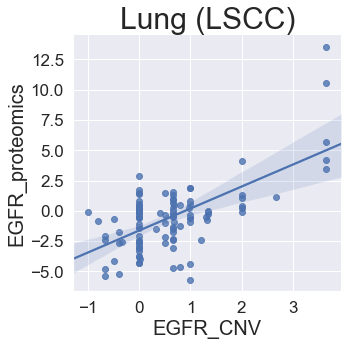

Correlation: 0.6360118853764314
P_value:1.4040007568507448e-13


In [22]:
plot_pearson(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics", hue = "none", title = "Lung (LSCC)" , ra_stats = False, show_plot = True, save_file_name = "png_files/Step2Cis_Lscc")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")


In [23]:
prot_CNV = colon.join_omics_to_omics(df1_name="transcriptomics", df2_name="CNV")
mutation = colon.get_clinical()
mergedDf = prot_CNV.merge(mutation, on="Patient_ID")
transcript_CNV_Tumor = mergedDf.loc[mergedDf['Sample_Tumor_Normal'] == "Tumor"]


cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


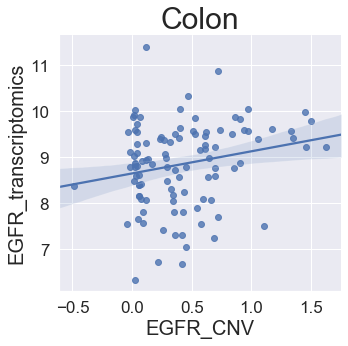

Correlation: 0.6360118853764314
P_value:1.4040007568507448e-13


In [24]:
plot_pearson(transcript_CNV_Tumor,"EGFR_CNV","EGFR_transcriptomics",hue = "none", ra_stats = False, title = "Colon", show_plot = True, save_file_name = "png_files/Step2Cis_Colon_transcriptomics")
print_stats(prot_CNV_Tumor,"EGFR_CNV","EGFR_proteomics")
